# <div style="color:white; font-size:30px; text-align:center; background:#055E91; padding:10px; margin:5px; border-radius:10px;">FASHION MNIST CLASSIFIER</div>

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Improting Libraries</div>

In [30]:
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

warnings.filterwarnings('ignore')

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Loading Dataset</div>

In [31]:
train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")

In [32]:
# taking a look at data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Sample Images</div>

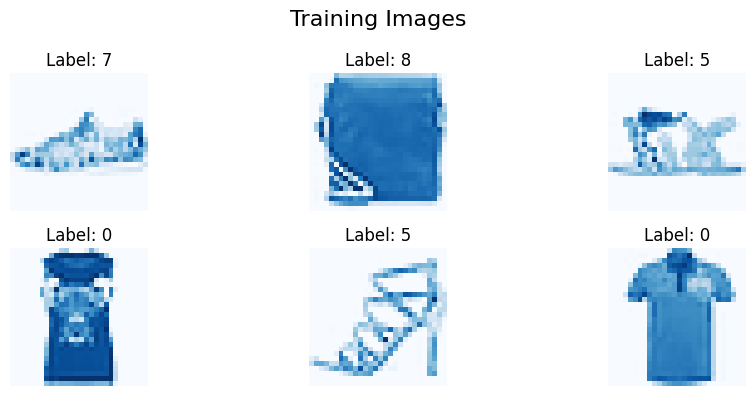

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(10, 4))
axes = axes.flatten()

for i in range(6):
    random_image = random.randint(0,train.shape[0]) 
    image = train.iloc[random_image, 1:].values
    label = train.iloc[random_image, 0]
    
    image_data = image.reshape(28, 28)
    
    axes[i-1].imshow(image_data, cmap='Blues')
    axes[i-1].set_title(f'Label: {label}')
    axes[i-1].axis('off') 

plt.suptitle("Training Images", size=16)
plt.tight_layout()
plt.show()

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Dataset Exploration</div>

In [34]:
# Training Information
print("--"*20)
print("**Training Data**")
print(f"Total Rows: {train.shape[0]}")
print(f"Total Features: {len(train.columns)}")
print(f"Inforamtion-")
print(train.info())
print("--"*20)

----------------------------------------
**Training Data**
Total Rows: 60000
Total Features: 785
Inforamtion-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
----------------------------------------


In [35]:
# Testing Information
print("--"*20)
print("**Testing Data**")
print(f"Total Rows: {test.shape[0]}")
print(f"Total Features: {len(test.columns)}")
print(f"Inforamtion-")
print(test.info())
print("--"*20)

----------------------------------------
**Testing Data**
Total Rows: 10000
Total Features: 785
Inforamtion-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None
----------------------------------------


In [36]:
# Null data
print(f"Null Values in Training Dataset - {train.isnull().sum().sum()}")
print(f"Null Values in Testing Dataset - {test.isnull().sum().sum()}")

Null Values in Training Dataset - 0
Null Values in Testing Dataset - 0


In [37]:
# Duplicate data
print(f"Duplicate Values in Training Dataset - {train.duplicated().sum()}")
print(f"Duplicate Values in Testing Dataset - {test.duplicated().sum()}")

Duplicate Values in Training Dataset - 43
Duplicate Values in Testing Dataset - 1


In [38]:
# Dropping Duplicate Data
train.dropna(inplace=True)
test.dropna(inplace=True)

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Dependent Feature</div>

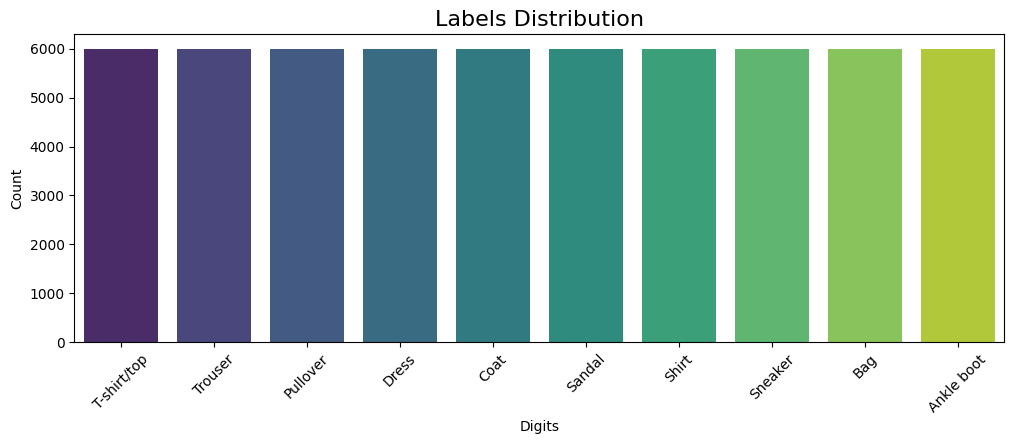

In [39]:
# plotting digits distribution
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12,4))
sns.countplot(train, x='label', palette='viridis')
plt.title("Labels Distribution", size=16)
plt.xlabel("Digits")
plt.ylabel("Count")
plt.xticks(range(len(labels)), labels, rotation=45)
plt.show()

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Data Preprocessing</div>

In [40]:
# Splitting data into dependent and indendent features
X_train = train.drop(columns='label')
y_train = train['label']

X_test = test.drop(columns='label')
y_test = test['label']

# Reshaping Data
X_train = np.reshape(X_train, (-1, 28, 28, 1))
X_test = np.reshape(X_test, (-1, 28, 28, 1))

# Normalizing Data
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

# Performing One Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Model Training</div>

In [41]:
# Define the model
model = Sequential([
    # First Convolutional Block
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),
    
    # Second Convolutional Block
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),
        
    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'), 
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(10, activation='softmax')
])


# Data Augmentation
datagen = ImageDataGenerator(
    zoom_range=0.1,
    height_shift_range=0.1,
    width_shift_range=0.1,
    rotation_range=10
)


# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


# Training the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=40,
    verbose=2,
)

Epoch 1/40
1875/1875 - 33s - 17ms/step - accuracy: 0.7298 - loss: 0.7362 - val_accuracy: 0.8449 - val_loss: 0.4192
Epoch 2/40
1875/1875 - 23s - 12ms/step - accuracy: 0.8102 - loss: 0.5248 - val_accuracy: 0.8720 - val_loss: 0.3556
Epoch 3/40
1875/1875 - 24s - 13ms/step - accuracy: 0.8339 - loss: 0.4616 - val_accuracy: 0.8811 - val_loss: 0.3044
Epoch 4/40
1875/1875 - 24s - 13ms/step - accuracy: 0.8489 - loss: 0.4268 - val_accuracy: 0.8983 - val_loss: 0.2881
Epoch 5/40
1875/1875 - 23s - 12ms/step - accuracy: 0.8555 - loss: 0.4041 - val_accuracy: 0.8924 - val_loss: 0.2753
Epoch 6/40
1875/1875 - 23s - 12ms/step - accuracy: 0.8643 - loss: 0.3771 - val_accuracy: 0.9115 - val_loss: 0.2479
Epoch 7/40
1875/1875 - 23s - 12ms/step - accuracy: 0.8709 - loss: 0.3629 - val_accuracy: 0.9024 - val_loss: 0.2692
Epoch 8/40
1875/1875 - 23s - 12ms/step - accuracy: 0.8759 - loss: 0.3505 - val_accuracy: 0.9103 - val_loss: 0.2490
Epoch 9/40
1875/1875 - 23s - 12ms/step - accuracy: 0.8814 - loss: 0.3326 - val_a

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Model Evaluation</div>

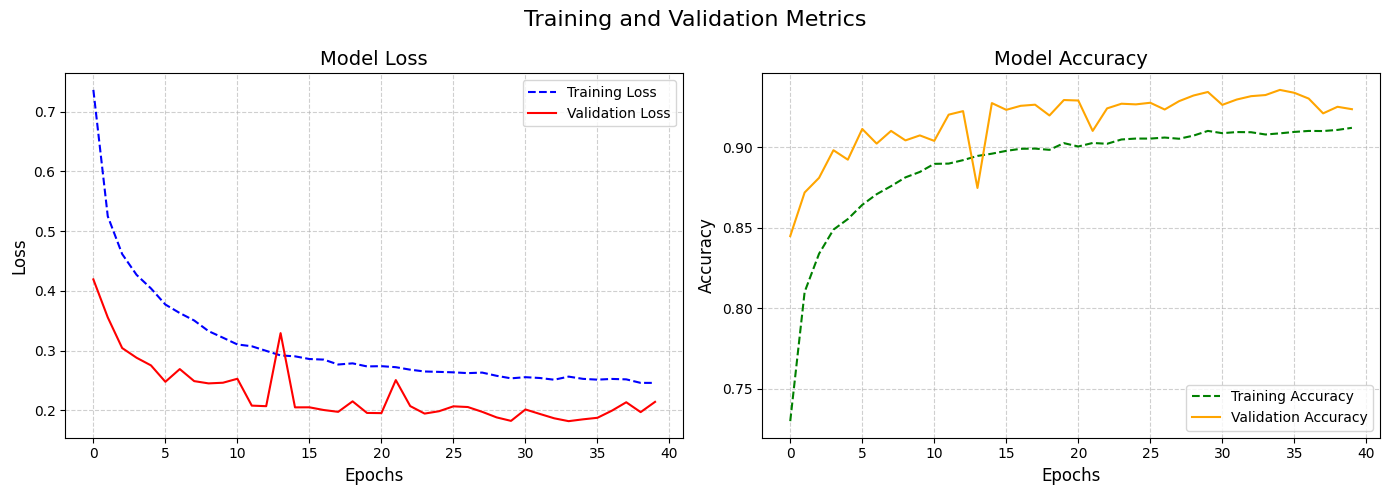

In [42]:
# Plotting Accuracy & Loss Curves
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
axs[0].plot(history.history['loss'], color='b', label='Training Loss', linestyle='--')
axs[0].plot(history.history['val_loss'], color='r', label='Validation Loss', linestyle='-')
axs[0].set_title('Model Loss', fontsize=14)
axs[0].set_xlabel('Epochs', fontsize=12)
axs[0].set_ylabel('Loss', fontsize=12)
axs[0].legend(loc='upper right', fontsize=10)
axs[0].grid(True, linestyle='--', alpha=0.6)

# Plot Accuracy
axs[1].plot(history.history['accuracy'], color='g', label='Training Accuracy', linestyle='--')
axs[1].plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy', linestyle='-')
axs[1].set_title('Model Accuracy', fontsize=14)
axs[1].set_xlabel('Epochs', fontsize=12)
axs[1].set_ylabel('Accuracy', fontsize=12)
axs[1].legend(loc='lower right', fontsize=10)
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Training and Validation Metrics', fontsize=16)
plt.tight_layout()
plt.show()

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Prediction On Random Test Data</div>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


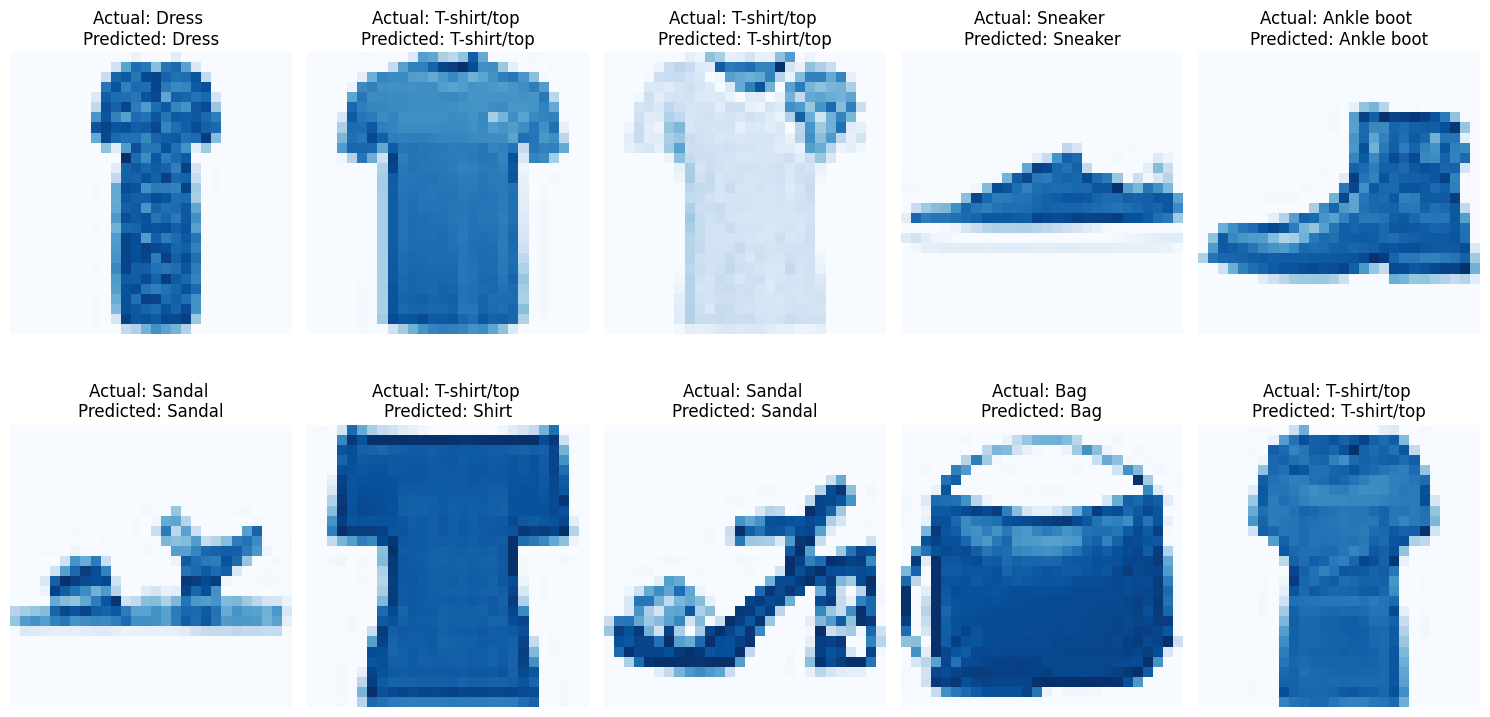

In [43]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_images = 10

random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)
random_images = X_test[random_indices]
random_labels = y_test[random_indices] 

predicted_labels = model.predict(random_images)  
predicted_classes = np.argmax(predicted_labels, axis=1)
true_classes = np.argmax(random_labels, axis=1)

fig, axs = plt.subplots(2, 5, figsize=(15, 8))

for i, ax in enumerate(axs.flat):
    image = random_images[i].reshape(28, 28)  
    
    ax.imshow(image, cmap='Blues')
    ax.axis('off')  
    
    true_label_name = labels[true_classes[i]]
    predicted_label_name = labels[predicted_classes[i]]
    ax.set_title(f"Actual: {true_label_name} \nPredicted: {predicted_label_name}", fontsize=12)

plt.tight_layout()
plt.show()